In [2]:
from keras import layers
from keras import models
from keras import optimizers

from keras.datasets import imdb

### Load the Data

In [89]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [90]:
train_data.shape

(25000,)

In [91]:
test_data.shape

(25000,)

In [92]:
train_data[5][:15]

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 7982, 1051, 2, 32, 85]

In [93]:
train_labels[0]

1

In [94]:
max([max(sequence) for sequence in train_data])

9999

In [95]:
word_index = imdb.get_word_index()

In [96]:
reversed_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [97]:
for i in train_data[2]:
    print(reversed_word_index.get(i-3, '?'), end=' ')

? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life 

### Prepare the data

In [98]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

In [99]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [100]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [101]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [102]:
train_labels.shape

(25000,)

In [103]:
test_labels.shape

(25000,)

In [104]:
x_train.shape

(25000, 10000)

In [105]:
x_test.shape

(25000, 10000)

### Build the network

In [106]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [107]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [108]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Train the network 

In [109]:
#Validation Set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [110]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, 
          batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 170us/step - loss: 0.5084 - binary_accuracy: 0.7813 - val_loss: 0.3797 - val_binary_accuracy: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.3004 - binary_accuracy: 0.9047 - val_loss: 0.3004 - val_binary_accuracy: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.2179 - binary_accuracy: 0.9285 - val_loss: 0.3085 - val_binary_accuracy: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1750 - binary_accuracy: 0.9437 - val_loss: 0.2840 - val_binary_accuracy: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.1427 - binary_accuracy: 0.9543 - val_loss: 0.2841 - val_binary_accuracy: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1150 - binary_accuracy: 0.9650 - val_loss: 0.3166 - val_bi

In [111]:
history_dict = history.history

In [112]:
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline

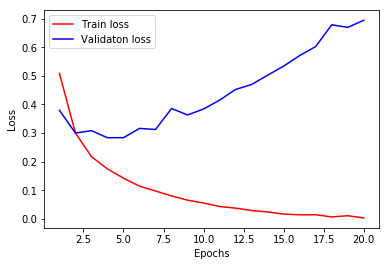

In [118]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'r', label='Train loss')
plt.plot(epochs, val_loss_values, 'b', label='Validaton loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

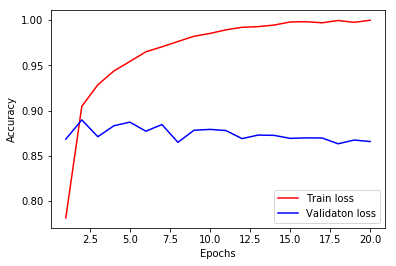

In [120]:
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, acc_values, 'r', label='Train loss')
plt.plot(epochs, val_acc_values, 'b', label='Validaton loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [123]:
#Validation loss started increasing after 4th epoch
history_dict['val_loss']

[0.3796839801311493,
 0.30037296442985534,
 0.3085316363811493,
 0.28397778186798095,
 0.28414869804382326,
 0.31658628668785094,
 0.31267625122070314,
 0.3859069999694824,
 0.3634944445133209,
 0.3842520221710205,
 0.4152833514213562,
 0.4525446306705475,
 0.4698149460315704,
 0.5022998136043548,
 0.5341710786819458,
 0.5709676340103149,
 0.6024567046165467,
 0.6782314112663269,
 0.6692697758674622,
 0.6941251074790955]

### Retrain the model with less number of epochs

In [124]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 87us/step - loss: 0.4749 - acc: 0.8217
Epoch 2/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 2s 69us/step - loss: 0.1982 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 87us/step


In [125]:
results

[0.32375606341362, 0.8732]